In [3]:
import pandas as pd

df = pd.read_csv('스니커즈데이터_최종.csv')
df

,순위,상품명,브랜드,조회수,좋아요,구매후기 개수,평점,누적판매량
0,1.000000,센테니얼 85 로우 - 화이트:블루 / IF5419,아디다스,179000.0,26990,674,4.8,3800.0
1,0.999778,슈퍼스타 - 화이트:블랙 / EG4958,아디다스,83000.0,31953,6154,4.9,14000.0
2,0.999555,XT-6 GTX - 블랙:에보니:루나 락 / L41663500,살로몬 스포츠스타일,78000.0,7194,1957,4.9,4200.0
3,0.999333,클럽 C 85 빈티지 - 크림 / DV6434,리복,84000.0,17894,2429,4.9,9000.0
4,0.999111,조그 100 2 (4E) - 블랙:블랙 / TJG138-9090,아식스,104000.0,47042,28716,4.9,29000.0
...,...,...,...,...,...,...,...,...
4495,0.000889,TENNIS WOMAN LACET - HIBISCUS,벤시몽,0.0,20,0,0.0,0.0
4496,0.000667,TENNIS WOMAN ELLY - PALE PINK,벤시몽,0.0,69,0,0.0,0.0
4497,0.000445,[US] 남성 PURE CLASSIC Sneakers (BLACK) CKSO2F512BK,챔피온,200.0,29,5,5.0,0.0
4498,0.000222,메이크 런닝화(WT),프로월드컵,0.0,93,7,5.0,50.0


# 종속변수 = '순위'

In [4]:
X = df[['평점', '조회수', '누적판매량', '구매후기 개수','좋아요']]
y = df['순위']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 0.060389874730416175
R-squared 0.3000446701809504


In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_corr = df.corr()
df_corr

,순위,조회수,좋아요,구매후기 개수,평점,누적판매량
순위,1.000000,0.400080,0.308809,0.200455,0.364555,0.256640
조회수,0.400080,1.000000,0.563241,0.431574,0.162845,0.558120
좋아요,0.308809,0.563241,1.000000,0.901232,0.127822,0.882122
구매후기 개수,0.200455,0.431574,0.901232,1.000000,0.077709,0.904119
평점,0.364555,0.162845,0.127822,0.077709,1.000000,0.099963
누적판매량,0.256640,0.558120,0.882122,0.904119,0.099963,1.000000


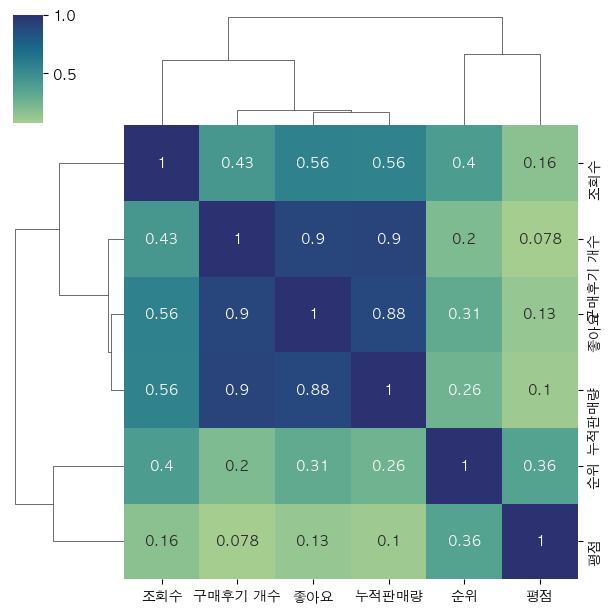

In [6]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 종속변수 = '누적판매량'

In [7]:
X = df[['평점', '조회수', '구매후기 개수','좋아요']]
y = df['누적판매량']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print('MSE',mse)
print('R-squared', r2)

MSE 373132.785963691
R-squared 0.8997768824228625


In [8]:
df = df.drop('순위', axis=1)

In [9]:
df_corr = df.corr()
df_corr

,조회수,좋아요,구매후기 개수,평점,누적판매량
조회수,1.000000,0.563241,0.431574,0.162845,0.558120
좋아요,0.563241,1.000000,0.901232,0.127822,0.882122
구매후기 개수,0.431574,0.901232,1.000000,0.077709,0.904119
평점,0.162845,0.127822,0.077709,1.000000,0.099963
누적판매량,0.558120,0.882122,0.904119,0.099963,1.000000


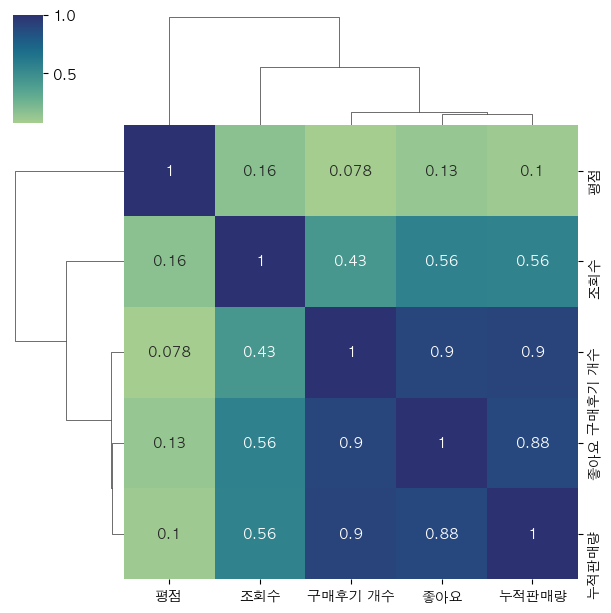

In [10]:
# 상관계수 그래프
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')

fig = sns.clustermap(df_corr,
              annot = True,
              cmap = 'crest',)
fig.fig.set_size_inches(6,6)

# 토픽모델링

In [11]:
#자연어 처리
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /Users/whan_i/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whan_i/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# 전처리 함수 정의
def preprocess(text):
    # 소문자 변환
    text = text.lower()
    # 특수 문자 제거
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # 어간 추출
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # 토큰 합치기
    text = " ".join(stemmed_tokens)
    return text

# '상품명'과 '브랜드명' 열에 적용
df['상품명'] = df['상품명'].apply(preprocess)
df['브랜드'] = df['브랜드'].apply(preprocess)
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# 이 코드는 10개의 토픽을 추출하고, 각 토픽별로 가장 관련성이 높은 단어 10개를 출력합니다. 이를 바탕으로 문서의 주제를 파악할 수 있습니다.

# 상품명과 브랜드명을 하나의 문서로 합치기
docs = df['상품명'] + ' ' + df['브랜드']

# TfidfVectorizer를 사용하여 문서에서 단어의 출현 빈도를 벡터화
tfidf = TfidfVectorizer(stop_words='english')
doc_vectors = tfidf.fit_transform(docs)

# LatentDirichletAllocation를 사용하여 토픽 모델링 수행
num_topics = 10 # 추출할 토픽의 수
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_vectors)

# 토픽별로 가장 관련성이 높은 단어 10개 출력
feature_names = tfidf.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-11:-1]]))

Topic #0:
스니커즈 밸롭 니트 블랙 아키클래식 화이트 휠라 엔에프엘 독일군 고어텍스
Topic #1:
아디다스 포럼 로우 스니커즈 오즈위고 컨버스 light militari 화이트 라이트
Topic #2:
스니커즈 폴로 로렌 랄프 레더 오트리 메달리스트 스웨이드 푸마 캔버스
Topic #3:
반스 화이트 블랙 스니커즈 밀리터리 어센틱 스탠다드 클래식 아식스 하이
Topic #4:
슈퍼스타 화이트 아디다스 스니커즈 스케쳐스 언다이드룸 맥스쿠셔닝 남성 반스 이소
Topic #5:
리복 아이더 화이트 스니커즈 캐치볼 하이크 그레이 클럽 엘에이알 독일군
Topic #6:
디스커버리 익스페디션 프로스펙스 캐치볼 플러스 오리지날 노스페이스 v2 버킷 2365
Topic #7:
오니츠카타이거 캔버스 스니커즈 이피티 dive 멕시코 66 블랙 슈펜 슈탠다드
Topic #8:
여성 스케쳐스 워크 스니커즈 남성 white 수페르가 sneaker 화이트 미즈노
Topic #9:
엠엘비 ny 스니커즈 black white 빅볼청키 코닥 청키 ivori 오니츠카타이거
